<a href="https://colab.research.google.com/github/Sona-kits/codtech_task3/blob/main/CODTECH_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

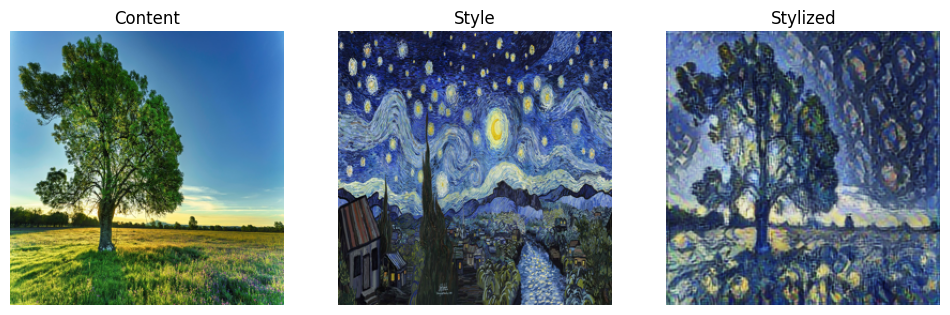

In [2]:
# 📚 Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

# 🔄 Load and preprocess images
def load_image(path):
    img = PIL.Image.open(path).resize((256, 256))
    img = np.array(img) / 255.0
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    return tf.expand_dims(img, axis=0)

# 🖼️ Load your uploaded images
content_image = load_image("your_photo.jpg")
style_image = load_image("art_style.jpg")

# 🧠 Load pre-trained style transfer model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 🎨 Apply style transfer
stylized_image = hub_model(content_image, style_image)[0]

# 📸 Show all images side-by-side
def show_images(content, style, stylized):
    plt.figure(figsize=(12, 4))
    titles = ["Content", "Style", "Stylized"]
    for i, img in enumerate([content, style, stylized]):
        plt.subplot(1, 3, i+1)
        plt.imshow(tf.squeeze(img))
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

show_images(content_image, style_image, stylized_image)

# 💾 Save the stylized image
output_image = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)[0]
PIL.Image.fromarray(output_image.numpy()).save("stylized_output.jpg")
